# Thermodynamic analysis of strategy enabling anaerobic production of PHB

In this script, we have performed the MDF analyses for the thermodynamic investigation of the NOG+EMP pathway in comparison to other strategies enabling PHB production, also demonstrating how the analysis of other pathways and metabolic engineering strategies could be analyzed by other researchers with the custom-made functions we have developed in this study.

In [1]:
from equilibrator_api import Q_ #for creating quantity variables
import equilibrator_custom_functions as eq #custom functions created during analysis
import numpy as np #numerical package
import math
import matplotlib.pyplot as plt #plotting package

Fragments already downloaded
Fragments already downloaded


# Input Files and their formats

The script's input is based on the two custom __input csv files__, which are:

   __The compound file__, with metabolite names, IDs and bounds. It is currently name "metabolite_reference_table"
   
   This file uses a custom csv file format, which contains information of multiple metabolites, to create a dictionary which will be used for the eQuilibrator API for high throughput analysis. This dictionary allows for writing reactions in a simpler way (with acronyms), and customizing the ranges of metabolites according to data. The columns contain the following elements:

| Metabolite Acronym        | keggID                          | Lower Bound (M)             | Upper Bound (M)               |
|------------------|----------------------------------|----------------------|------------------------|
|Custom-defined name for metabolite| Kegg ID to identify metabolite (necessary to use specific kegg ID) | Custom-defined minimal concentration (in M)| Custom-defined maximal concentration (in M) |

Notice that the column names do not need to be mantained in order to be recognized in the script. More usefull information can be added to the other columns, as the script will ignore the information stored in these.

   __The pathway file__, with reaction names, formulae, fluxes, and, in the case of ECM, enzyme parameters (which will be read by other functions below). Being pathway specific, there are many files referenced in this script. The columns contain the follow basic setup:
   
| Reaction Formula        | Relative Flux                          | Reaction Name  |     Standard dG (kJ/mol)        | kcrf(1/s) | MWe(Da)        | kM(mM) |
|------------------|----------------------------------|----------------------|------------------------|-----------------|-------|-----|
|Using the acronyms defined in the compound file: S1 + S2 <=> P1 + P2| The relative stoichiometric coefficient of the reaction in the pathway | Customizable name to identify the reaction in graphs, for example | __(Optional)__ Standard Gibs Free Energy of Reaction in kJ/mol. These are custom values that can replace the values obtained from the eQuilibrator packages|__(Only needed for ECM)__ Forward catalytic rate of reaction's enzyme in 1/s (mind the direction of the reaction) |__(Only needed for ECM)__ Enzyme molecular weight, equivalent to Daltons |__(Only needed for ECM)__ Michaelis costants of each substrate and product (except water) in milimolar, with format example 'S1: 0.1 S2:0.02 P1:3 P2:0.3' | 

# Setting Intracellular Conditions

Below we set the intracellular conditions in *E. coli*, i.e the pH, ionic strengh, temperature and pMg (which have an effect on the thermodynamics of reactions). Note that metabolite concentration bounds are also organism specific, but are defined in the compound file.

In the cell bellow the name of the compound csv file is defined __("metabolite_reference_table")__. With the function __eq.obtain_compound_settings( string: compound_file_name )__, we construct a __CompoundSettings__ object containing data structures for idetifying compounds and setting their maximal and minimal concentrations for the model)

With __eq.change_bounds__ , one can create a new CompoundSettings object with specific changes in the metabolite concentration bounds.

The __eq.fix_concentrations__ function can also be used when the concentration needs to fixed at a specific concentration

In [2]:
#E. coli physiological conditions as a dictionary
E_coli_con = {
            "p_h": str(Q_("7.5")),
            "p_mg": str(Q_(3)),
            "ionic_strength": str(Q_('200 mM')),
            "temperature": str(Q_(37+273.15,"K")),
            "kcat_source": "fwd",
}

#Generating Compound Settings with the default eQuilibrator bounds
cs_default_bounds = eq.obtain_compound_settings("metabolite_reference_table_custom", custom_bounds = True)

# Initial Max-min Driving Force (MDF) analysis

The MDF analysis can be quickly performed with the __eq.MDF_analysis__ function, receiving a full report of the results:

In [3]:
#mdf_result = eq.MDF_analysis("EMP",cs_default_bounds,E_coli_con)
#import os  
#os.rename('MDF.tiff','MDFEMP_custom.tiff')

In [4]:
#mdf_result = eq.MDF_analysis("ED",cs_default_bounds,E_coli_con)
#os.rename('MDF.tiff','MDFED_custom.tiff')

In [5]:
#mdf_result = eq.MDF_analysis("NOGEMP",cs_default_bounds,E_coli_con)
#os.rename('MDF.tiff','MDFNOGEMP_custom.tiff')

In [6]:
#mdf_result = eq.MDF_analysis("EMPsc",cs_default_bounds,E_coli_con)

In [7]:
#mdf_result = eq.MDF_analysis("EDsc",cs_default_bounds,E_coli_con)

In [8]:
#mdf_result = eq.MDF_analysis("NOGEMPsc",cs_default_bounds,E_coli_con)

# Concentration Variability Analysis (CVA)

A function for easy execution of CVA has also been created, __eq.MDF_CVA__. The results will automatically be printed unless  __print_results = False__ is used. The optional argument __compounds__ can also be used to specify what metabolites will be analyzed, but by default CVA will be performed for all metabolites except water. The function will highlight which linear problems are unbounded (in which concentration could vary indefinitely) or unfeasible. CVA results are given in the form of a list of tuples with metabolite name, minimum and maximum concentrations and can be later plotted with __eq.CVA_plot__, for when the user would like to customize the plot layout:

Pi max: unbounded
FOR min: unbounded
Gluc max: unbounded
ACDH min: unbounded
ETOH min: unbounded
PHB min: unbounded
[('ATP', 9.878672973667175e-09, 26.749505267785015), ('ADP', 8.709095651221727e-08, 235.82519698849626), ('NAD', 4.956229882392771e-05, 26.78949398070062), ('Pi', 0.00011569164057872957, 'unbounded'), ('NADH', 3.6106691701486964e-07, 0.19534687110448967), ('CoA', 7.244519471090034e-12, 0.0026231219269909453), ('AcCoA', 0.004821327862425915, 561113.820760889), ('PYR', 1.0119209125945195e-08, 246.21241958015997), ('FOR', 'unbounded', 18.104181633155807), ('Gluc', 1.1276607362884795e-09, 'unbounded'), ('PEP', 3.864955316318555e-09, 0.00843853130603285), ('G3P', 3.2840774869178287e-06, 0.0014193235874648124), ('ACDH', 'unbounded', 0.04229303483749021), ('DHAP', 0.0003786817923318177, 1.3409436926456955), ('P3G', 5.971181260413974e-05, 36.177191308126815), ('AcAcCoA', 3.9396605091477525e-09, 2.1294716750479884e-05), ('G6P', 0.0028185470908856365, 124973.18564812782), ('BPG', 1

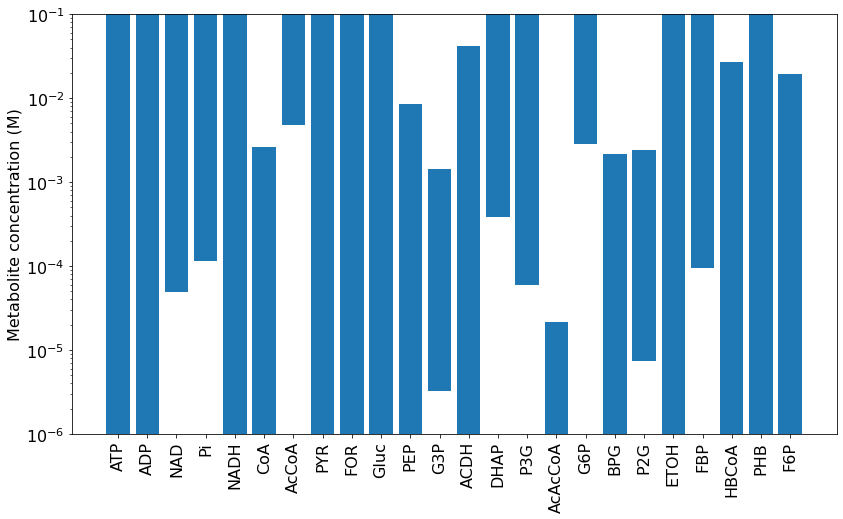

In [9]:
cva = eq.MDF_CVA(1,'EMP',cs_default_bounds,E_coli_con, custom_dGs = False, print_results = False)
fig = plt.figure(figsize=(12, 7.5))
ax = plt.subplot()
eq.CVA_plot(cva, ax=ax)

plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.ylabel('Metabolite concentration (M)',fontsize=16)
#plt.xlabel('Metabolites',fontsize=16)
#ax.set_title('Concentration Variability Analysis for an MDF = 2.8 kJ/mol', fontsize=16)
plt.tight_layout()
print(cva)
#fig.savefig('CVA_EMP_1kJ.tiff', dpi = 150)

In [10]:
import pandas as pd 
df = pd.DataFrame(cva)
df.to_csv('CVA_EMP_1kJ.csv')

Pi max: unbounded
FOR min: unbounded
Gluc max: unbounded
ACDH min: unbounded
ETOH min: unbounded
PHB min: unbounded
[('ATP', 2.64194273585719e-10, 37.03049317264101), ('ADP', 6.291139545830253e-08, 8817.904977202814), ('NAD', 2.5862110209477822e-05, 26.789493980700883), ('Pi', 6.036907145069535e-05, 'unbounded'), ('NADH', 3.6106691701486705e-07, 0.3743638829770261), ('CoA', 7.244519471090008e-12, 0.0026231219269909427), ('AcCoA', 0.0048213278624259235, 561113.8207608949), ('PYR', 1.0119209125945339e-08, 0.16979826608835735), ('FOR', 'unbounded', 18.104181633155726), ('Gluc', 3.1526762957722833e-10, 'unbounded'), ('PEP', 3.864955316318596e-09, 0.00843853130603285), ('G3P', 3.284077486917817e-06, 0.012618887534435332), ('ACDH', 'unbounded', 0.08105061860026704), ('P3G', 5.9711812604139635e-05, 69.33018039520509), ('AcAcCoA', 2.055754811484203e-09, 2.1294716750479843e-05), ('G6P', 4.623352756619856e-09, 124973.18564812715), ('BPG', 1.1587904635449383e-08, 0.004141193395763579), ('P2G', 7.

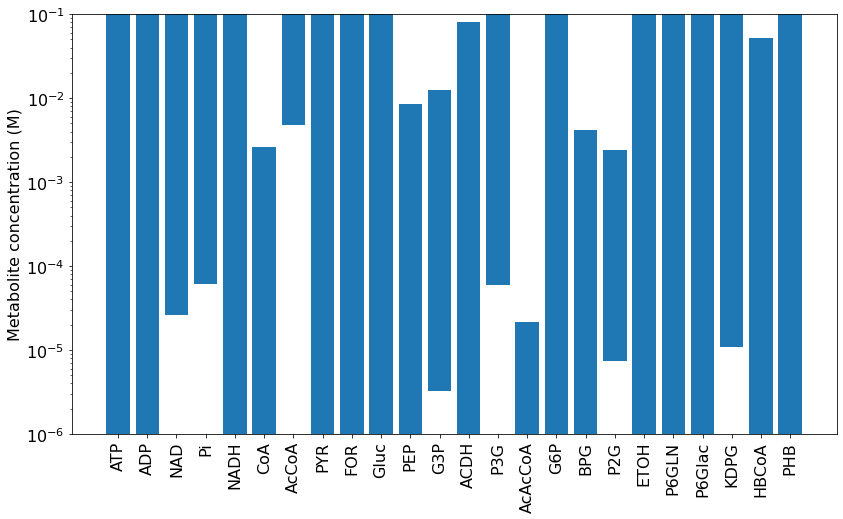

In [11]:
cva = eq.MDF_CVA(1,'ED',cs_default_bounds,E_coli_con, custom_dGs = False, print_results = False)
fig = plt.figure(figsize=(12, 7.5))
ax = plt.subplot()
eq.CVA_plot(cva, ax=ax)

plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.ylabel('Metabolite concentration (M)',fontsize=16)
#plt.xlabel('Metabolites',fontsize=16)
#ax.set_title('Concentration Variability Analysis for an MDF = 2.8 kJ/mol', fontsize=16)
plt.tight_layout()
print(cva)
#fig.savefig('CVA_ED_1kJ.tiff', dpi = 150)

In [12]:
import pandas as pd 
df = pd.DataFrame(cva)
df.to_csv('CVA_ED_1kJ.csv')

CO2 min: unbounded
Gluc max: unbounded
PHB min: unbounded
[('ATP', 9.44979697009745e-10, 37.03049317264098), ('ADP', 6.291139545830297e-08, 2465.280478905343), ('NAD', 2.5862110209477822e-05, 25.998732844134715), ('Pi', 6.036907145069492e-05, 0.09393703709950431), ('NADH', 3.7204890169030817e-07, 0.374363882977028), ('CoA', 2.972656733620469e-05, 0.0026231219269909475), ('CO2', 'unbounded', 359487.87527131184), ('AcCoA', 0.004821327862425919, 1.4557236241302887), ('PYR', 1.0192276991914369e-13, 246.21241958016063), ('Gluc', 1.1276607362884714e-09, 'unbounded'), ('PEP', 3.864955316318582e-09, 0.008438531306032835), ('G3P', 0.00036283566247010556, 0.054809670398049154), ('DHAP', 0.00030059624102459447, 0.016892791447301336), ('Ri5P', 3.77113015510174e-05, 0.03829605821172017), ('P3G', 5.971181260413953e-05, 69.33018039520522), ('AcAcCoA', 2.05575481148421e-09, 2.0666148161890893e-05), ('Ru5P', 6.9278468777671794e-06, 0.001865117275383537), ('G6P', 0.0028185470908856317, 124973.1856481267

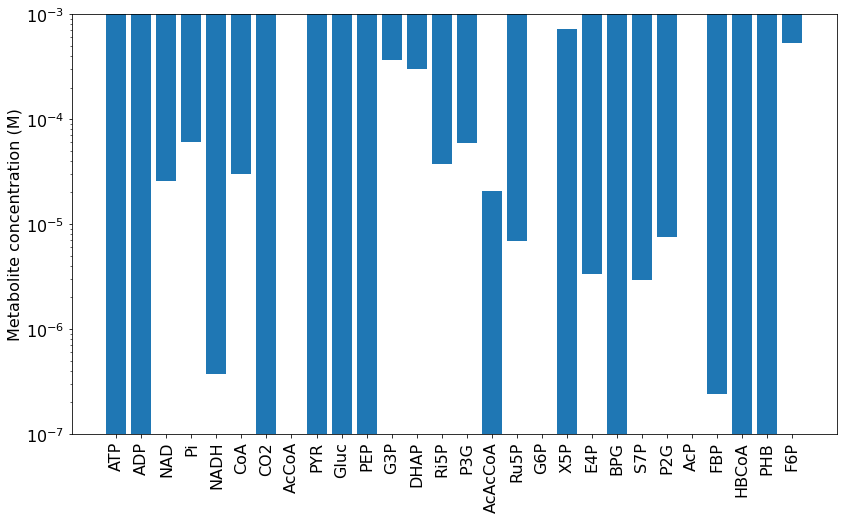

In [15]:
cva = eq.MDF_CVA(1,'NOGEMP',cs_default_bounds,E_coli_con, custom_dGs = False, print_results = False)

fig = plt.figure(figsize=(12, 7.5))
ax = plt.subplot()
eq.CVA_plot(cva, ax=ax)

plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.ylabel('Metabolite concentration (M)',fontsize=16)
#plt.ylim( (pow(10,-7),pow(10,-3)) )
#plt.xlabel('Metabolites',fontsize=16)
#ax.set_title('Concentration Variability Analysis for an MDF = 2.8 kJ/mol', fontsize=16)
plt.tight_layout()
print(cva)
#fig.savefig('CVA_NOGEMP_1kJ.tiff', dpi = 150)

In [14]:
import pandas as pd 
df = pd.DataFrame(cva)
df.to_csv('CVA_NOGEMP_1kJ.csv')